In [588]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tckr
from subprocess import call
from IPython.display import Image
from sklearn.preprocessing import MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier


# A simple classification model

by: Andres Ethorimn Lobarb


## <font color='blue'>Second Part</font>

___

In this part we will use the cleaned data to perform classification modeling using some tools provided by <font color='green'>Scikit-Lean</font>; if you have any doubt, please get in touch emailing me at <aethorimn@gmail.com>. __<font color='purple'>THANK YOU VERY MUCH FOR LOOKING THIS WORK!</font>__
___


In [289]:
df = pd.read_csv('../data/diabetic_cleaned.csv')
df

race  gender      age  admission_type_id  \
0            Caucasian  Female   [0-10)                  6   
1            Caucasian  Female  [10-20)                  1   
2      AfricanAmerican  Female  [20-30)                  1   
3            Caucasian    Male  [30-40)                  1   
4            Caucasian    Male  [40-50)                  1   
...                ...     ...      ...                ...   
70426        Caucasian  Female  [70-80)                  1   
70427            Other  Female  [40-50)                  1   
70428            Other  Female  [60-70)                  1   
70429        Caucasian  Female  [80-90)                  1   
70430        Caucasian    Male  [70-80)                  1   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
0                            25                    1                 1   
1                             1                    7                 3   
2                             1                    7                 2   
3                             1                    7                 2   
4                             1                    7                 1   
...                         ...                  ...               ...   
70426                         1                    7                 9   
70427                         1                    7                14   
70428                         1                    7                 2   
70429                         1                    7                 5   
70430                         1                    7                 6   

       num_lab_procedures  num_procedures  num_medications  ...  change  \
0                      41               0                1  ...      No   
1                      59               0               18  ...      Ch   
2                      11               5               13  ...      No   
3                      44               1               16  ...      Ch   
4                      51               0                8  ...      Ch   
...                   ...             ...              ...  ...     ...   
70426                  50               2               33  ...      Ch   
70427                  73               6               26  ...      Ch   
70428                  46               6               17  ...      No   
70429                  76               1               22  ...      Ch   
70430                  13               3                3  ...      No   

       diabetesMed  readmitted procedures visits age_cat  gender_cat  \
0                0           0         41      0       0           0   
1                1           1         59      0       1           0   
2                1           0         16      3       2           0   
3                1           0         45      0       3           1   
4                1           0         51      0       4           1   
...            ...         ...        ...    ...     ...         ...   
70426            1           1         52      0       7           0   
70427            1           1         79      1       4           0   
70428            1           1         52      3       6           0   
70429            1           0         77      1       8           0   
70430            0           0         16      0       7           1   

       diag_1_cat  diag_2_cat  diag_3_cat  
0             123         630         644  
1             141          76         112  
2             444          75         735  
3             542          91         238  
4              54          22          77  
...           ...         ...         ...  
70426         385         365          79  
70427         401         386         327  
70428         673         375         238  
70429         156         516         157  
70430         352         334         520  

[70431 rows x 50 columns]

In [290]:
df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'procedures', 'visits', 'age_cat', 'gender_cat', 'diag_1_cat',
       'diag_2_cat', 'diag_3_cat'],
      dtype='object')


___

## Visualization

Let us generate some plots based on the features we got. The utility of this pocedure is allowing us to do some superficial analysis of information and helping us to take decisions about further analysis. 
___


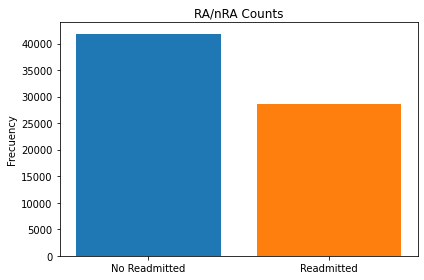

0    41898
1    28533
Name: readmitted, dtype: int64

In [613]:
fig, ax = plt.subplots(figsize=(6, 4))
plt.setp(ax, xticks=[1, 2], xticklabels=['No Readmitted', 'Readmitted'])
ax.bar([1], df['readmitted'].value_counts()[0])
ax.bar([2], df['readmitted'].value_counts()[1])
ax.set_ylabel('Frecuency')
ax.set_title('RA/nRA Counts')
plt.tight_layout()
plt.show()
df['readmitted'].value_counts()

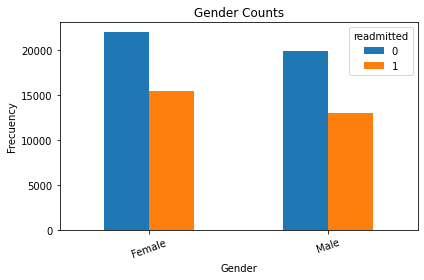

In [246]:
fig, ax = plt.subplots()
df[['gender', 
    'readmitted']].groupby(['readmitted'])['gender'].value_counts().unstack(0).plot(kind='bar',
                                                                                    figsize=(6, 4), 
                                                                                    ax=ax, 
                                                                                    rot=20)
ax.set_xlabel('Gender')
ax.set_ylabel('Frecuency')
ax.set_title('Gender Counts')
plt.tight_layout()
plt.show()

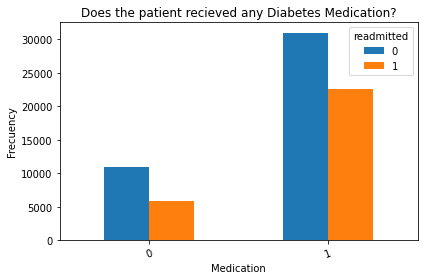

In [331]:
fig, ax = plt.subplots()
df[['diabetesMed', 
    'readmitted']].groupby(['readmitted'])['diabetesMed'].value_counts().unstack(0).plot(kind='bar',
                                                                                         figsize=(6, 4),
                                                                                         ax=ax,
                                                                                         rot=20)
ax.set_xlabel('Medication')
ax.set_ylabel('Frecuency')
ax.set_title('Does the patient recieved any Diabetes Medication?')
plt.tight_layout()
plt.show()

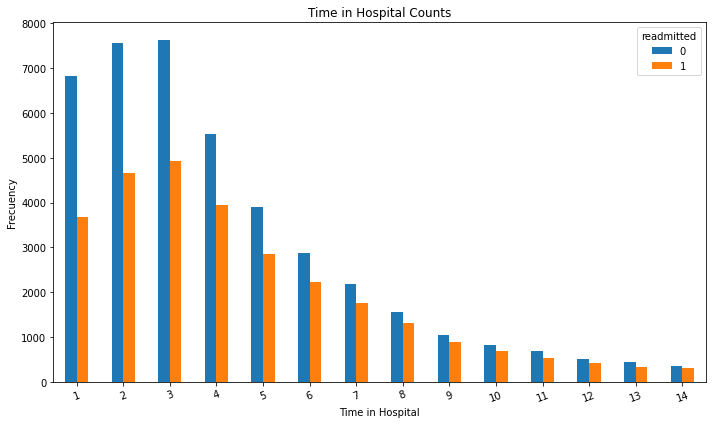

In [612]:
fig, ax = plt.subplots()
df[['time_in_hospital', 
    'readmitted']].groupby(['readmitted'])['time_in_hospital'].value_counts().unstack(0).plot(kind='bar', 
                                                                                              figsize=(10, 6), 
                                                                                              ax=ax, 
                                                                                              rot=20)
ax.set_xlabel('Time in Hospital')
ax.set_ylabel('Frecuency')
ax.set_title('Time in Hospital Counts')
plt.tight_layout()
plt.show()

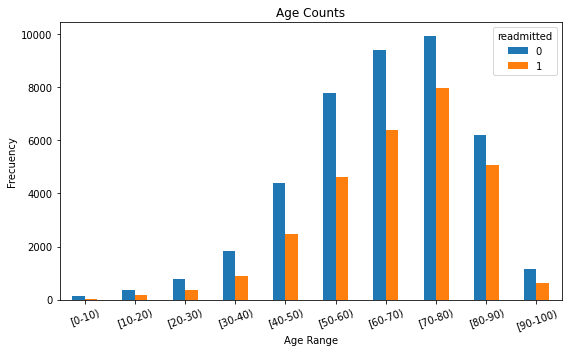

In [610]:
fig, ax = plt.subplots()
df[['age', 
    'readmitted']].groupby(['readmitted'])['age'].value_counts().unstack(0).plot(kind='bar',
                                                                                 figsize=(8, 5),
                                                                                 ax=ax,
                                                                                 rot=20)
ax.set_xlabel('Age Range')
ax.set_ylabel('Frecuency')
ax.set_title('Age Counts')
plt.tight_layout()
plt.show()

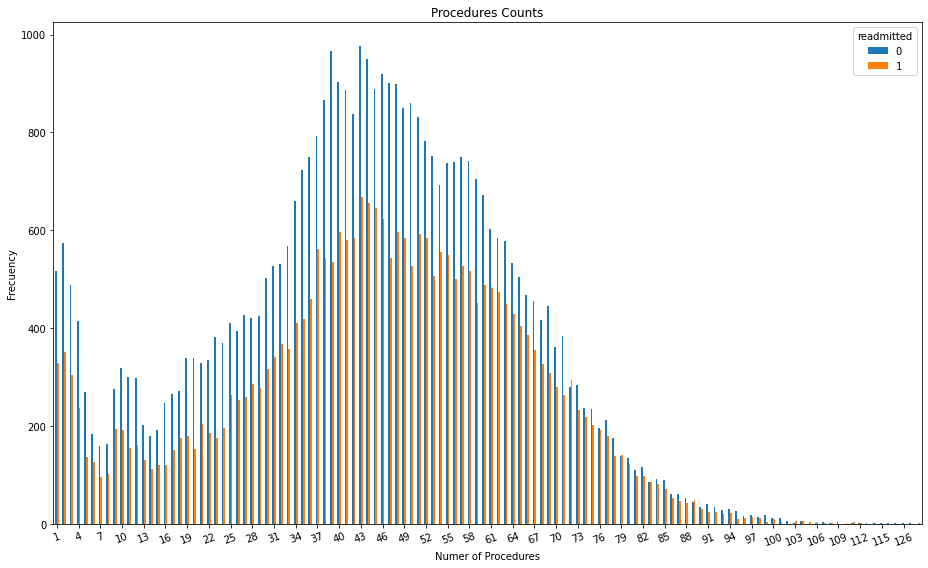

In [332]:
fig, ax = plt.subplots()
df[['procedures', 
    'readmitted']].groupby(['readmitted'])['procedures'].value_counts().unstack(0).plot(kind='bar',
                                                                                        figsize=(13, 8),
                                                                                        ax=ax, 
                                                                                        rot=20)
ax.xaxis.set_major_locator(tckr.MultipleLocator(3))
ax.set_xlabel('Numer of Procedures')
ax.set_ylabel('Frecuency')
ax.set_title('Procedures Counts')
plt.tight_layout()
plt.show()

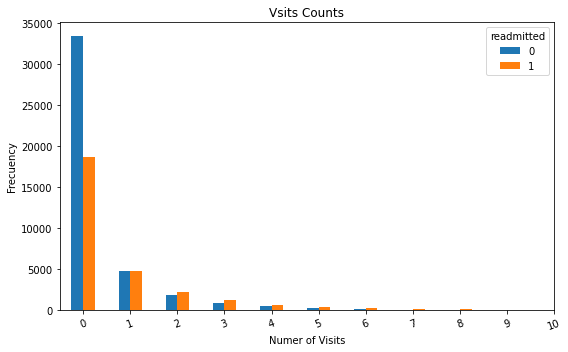

In [333]:
fig, ax = plt.subplots()
df[['visits', 
    'readmitted']].groupby(['readmitted'])['visits'].value_counts().unstack(0).plot(kind='bar',
                                                                                    figsize=(8, 5),
                                                                                    ax=ax,
                                                                                    rot=20)
ax.set_xlim(-0.5, 10)
ax.set_xlabel('Numer of Visits')
ax.set_ylabel('Frecuency')
ax.set_title('Vsits Counts')
plt.tight_layout()
plt.show()

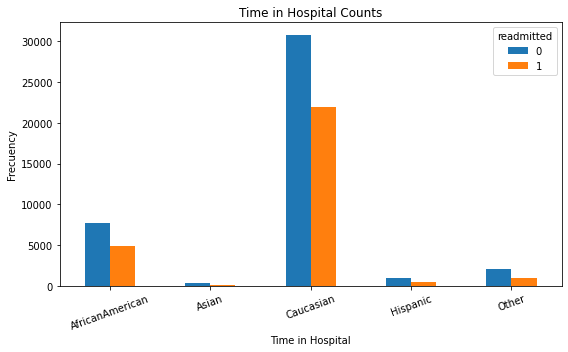

In [608]:
fig, ax = plt.subplots()
df[['race', 
    'readmitted']].groupby(['readmitted'])['race'].value_counts().unstack(0).plot(kind='bar', 
                                                                                  figsize=(8, 5),
                                                                                  ax=ax,
                                                                                  rot=20)
ax.set_xlabel('Time in Hospital')
ax.set_ylabel('Frecuency')
ax.set_title('Time in Hospital Counts')
plt.tight_layout()
plt.show()

In [ ]:
procedures', 'visits'


___

From the charts above, we see the number of readmitted patients is about 31% lesser than the number of those who did not need attention again. This result tells us about the efficiency of the treatements during the years the data was collected. On the other hand, we found the proportion of _readmitted/no-readmitted_ patients depending on the gender is quite similar being women the group that most attended treatements for diabetes. Similarly, Caucasians where the ethnic group with most patients. However, we cannot conclude anythnig beyond because we do not have more information about the sample; it is, we cannot assume gender or ethnic background here tell us necessary traits such as if the data actually represents a representative sample of the city's population, or if it is biased.

Finally, a more interesting results were the <font color='maroon'>'procedures'</font>, <font color='maroon'>'time_in_hospital'</font>, and the <font color='maroon'>'age'</font> histograms. Since we can see the data behaves following certain type of probability distribution, it is tempting to try fitting the data to an skewed PMF (probability mass function) to look for other properties.

Now, it is time to use some classification models.


## Classification

To do this job correctly, there are at least three factors we need to take into account:

- [ ] Select most llamative features.
- [ ] Decide about metrics.
- [ ] Perform classification model.

With this in mind, we can proceed with the first step:

### Splitting the data

For model trainng and testing we will create our <font color='blue'>X_train</font>, <font color='blue'>X_test</font>, <font color='blue'>y_train</font>, and <font color='blue'>y_test</font> sets using `sklearn.model_selection.test_train_split` with 120 as the _random state_ of the pseudoaleatory number algorithm and using 33% of the data for model testing. 

###  Identifiying the most relevant features

We can just put all the features in the blender and look forward if we got something interesting. Nevertheless, there is another interesting option. We can apply a _Recursive Feature Elimination_ (RFE) using a Linear Discrimination Analysis (LDA) and thus get the 40% most important features related with the target variable in order to try getting better accuracy results.

___


In [387]:
#Defining the control and the responsa variables

X_all = df[['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 
            'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
            'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 
            'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
            'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'procedures',
            'visits', 'age_cat', 'gender_cat', 'diag_1_cat', 'diag_2_cat', 'diag_3_cat']]
y_all = df['readmitted']

In [389]:
#Makign a data splitting, for this study we'll use the 120 as random state and 33% of data for model training

X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all, y_all, test_size=.33, random_state=120)

In [390]:
#Let us take into consideration 40% of the most relevant features according to the model

len(X_all.columns.values)*0.40

14.0

In [391]:
mod = LinearDiscriminantAnalysis()
rfe_mod = RFE(mod, n_features_to_select=14)
rfe_fit = rfe_mod.fit(X_all_train, y_all_train)

print(f'Num. features: {rfe_fit.n_features_}')
print(f'Crucial features: {rfe_fit.support_}')
print(f'Feature ranking: {rfe_fit.ranking_}')

Num. features: 14
Crucial features: [False False False False  True False False False  True False  True False
 False  True False  True False  True  True  True  True  True False False
  True False False  True False  True  True False False False False]
Feature ranking: [ 8 16 12 10  1 14 13  5  1  9  1  7 21  1  4  1  2  1  1  1  1  1  6 11
  1 20 22  1 15  1  1  3 18 17 19]


In [392]:
X_all.columns.values[rfe_fit.support_]

array(['number_diagnoses', 'repaglinide', 'chlorpropamide', 'glipizide',
       'tolbutamide', 'rosiglitazone', 'acarbose', 'miglitol',
       'troglitazone', 'tolazamide', 'glipizide-metformin',
       'metformin-pioglitazone', 'visits', 'age_cat'], dtype=object)


___

It makes sense the best ranked features have to do with medicines. A reason could be that if we are measuring the effectivity of certain treatement depending on the <font color='green'>readmissions</font> rate, it is logical to think the medicines used to treat the cases are strongly related with the outcomes.  

This resuld can be useful to rate any medicine's effectiveness over another one; nonetheless, this result would not be interesting enough. On the other hand, we see the category <font color='maroon'>'diabetesMed'</font> is synthesizing the using of any medication for diabetes. Therefore, using this variable instead of each medicine data may say us which other features are important for the results besides the effectiveness of the medicines itself. Now, we will create another splitting model but without including the medicines columns but just using <font color='maroon'>'diabetesMed'</font> data to enphatize the precence of any drug.

___


In [400]:
#Definin new control variables with the same target as above

X_1 = df[['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 
          'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'diabetesMed', 'procedures', 'visits', 'age_cat', 
          'gender_cat', 'diag_1_cat', 'diag_2_cat', 'diag_3_cat']]
y_1 = df['readmitted']

In [401]:
#Splitting data_1

X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=.33, random_state=120)

In [402]:
len(X_1.columns.values)*0.40

6.0

In [407]:
#Let's implement the recursive feature elimination again with the new dataset

rfe_1_mod = RFE(mod, n_features_to_select=6)
rfe_1_fit = rfe_1_mod.fit(X_1_train, y_1_train)

print(f'Num. features: {rfe_1_fit.n_features_}')
print(f'Crucial features: {rfe_1_fit.support_}')
print(f'Feature ranking: {rfe_1_fit.ranking_}')

Num. features: 6
Crucial features: [ True False False False  True False False  True False  True  True  True
 False False False]
Feature ranking: [ 1  7  4  2  1  5  3  1  6  1  1  1  9  8 10]


In [408]:
X_1.columns.values[rfe_1_fit.support_]

array(['admission_type_id', 'number_diagnoses', 'diabetesMed', 'visits',
       'age_cat', 'gender_cat'], dtype=object)


___

#### Chosen features

The final list of features we will use:

1. <font color='maroon'>'admission_type_id'</font>
2. <font color='maroon'>'munber_diagnoses'</font>
3. <font color='maroon'>'diabetesMed'</font>
4. <font color='maroon'>'visits'</font>
5. <font color='maroon'>'age_cat'</font>
6. <font color='maroon'>'gender_cat'</font>

### Model selection and evaluation metrics

We are right here:

- [x] Select most llamative features.
- [ ] Decide about metrics
- [ ] Perform classification model.

Before using any model, it is importante to highlight the metrics we will use to control the model preformance. Based on the `sklear.metrics` documentary, maybe the best metrics for this study will be __training accuracy__, __test accuracy__, __precision__, __recall__, and the __confussion matrix__. Additionally, as we can might have an imbalanced class distribution for <font color='maroon'>'readmission'</font> target, it would be desirable to perform a __cross validation score__ via `sklearn.model_selection.cross_val_score` also using <font color='green'>repeated stratified KFold</font> (via `sklearn.model_selection.RepeatedStratifiedKFold`) as _cv_ generator. For this study, let us use _n splits_ = 5 and _n repeats_ = 10:

___


In [467]:
X = df[['admission_type_id', 'number_diagnoses', 'diabetesMed', 'visits', 'age_cat', 'gender_cat']]
y = df['readmitted']

In [468]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=120)

In [479]:
#Defining CV splitter for the cross_val_score

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=120) #the same random state than in test_train_split!

In [490]:
#A final record for the information we are generation with the algorithm:

recording = {}


___

We finally have reached the last step.

- [x] Select most llamative features.
- [x] Decide about metrics
- [ ] Perform classification model.

Since we have two possible classes for the target variable, let us choose some models accordingly:

#### Logistic Regression Classification

It is pretty simple yet still powerful model, thanks to `sklearn` [examples](https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html) we can use it to classify our output:

___


In [432]:
log_reg = LogisticRegression(C=10)
log_reg.fit(X_train, y_train)
y_train_hat = log_reg.predict(X_train)
y_test_hat = log_reg.predict(X_test)

In [507]:
# Training and test accuracy and adding the results to the final recording.

print(f'Training score: {log_reg.score(X_train, y_train)}\nTest score: {log_reg.score(X_test, y_test)}')
print(f'----------------------------------\nRecall score: {recall_score(y_test, y_test_hat)}\nPrecision score: ' + 
      f'{precision_score(y_test, y_test_hat)}')
print(f'----------------------------------\nCross val. score: {cross_val_score(log_reg, X_train, y_train, cv=rskf).mean()}')

recording.update({str(log_reg):{'Train Accuracy':log_reg.score(X_train, y_train),
                                'Test Accuracy':log_reg.score(X_test, y_test),
                                'Recall':recall_score(y_test, y_test_hat), 
                                'Precision':precision_score(y_test, y_test_hat)}})

Training score: 0.6133338984487582
Test score: 0.6123133846749559
----------------------------------
Recall score: 0.13240122868340218
Precision score: 0.5860290670417253
----------------------------------
Cross val. score: 0.6130626092625765


In [436]:
#Confussion matrix

log_cm = confusion_matrix(y_test, y_test_hat)
print(log_cm)

[[12742  1060]
 [ 7951  1490]]



___

###### Two features visualization

Now we are going yo try to construct a visualization of the classification usin this algorithm using the two features with several associated labels: <font color='maroon'>'number_diagnoses'</font> and <font color='maroon'>'admission_type_id'</font>.
___


In [462]:
miniX = df[['number_diagnoses', 'visits']]
miniy = df['readmitted']

miniX_train, miniX_test, miniy_train, miniy_test = train_test_split(miniX, miniy, test_size=.33, random_state=120)

minilog_reg = LogisticRegression(C=10)
minilog_reg.fit(miniX_train, miniy_train)
miniy_train_hat = minilog_reg.predict(miniX_train)
miniy_test_hat = minilog_reg.predict(miniX_test)

/tmp/ipykernel_1929/1064312946.py:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


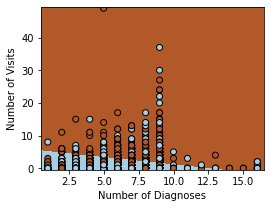

In [464]:
#Provided by sklearn guides:

x_min, x_max = miniX_test.loc[:, 'number_diagnoses'].min()-.5, miniX_test.loc[:, 'number_diagnoses'].max()+.5
y_min, y_max = miniX_test.loc[:, 'visits'].min()-.5, miniX_test.loc[:, 'visits'].max()+.5
h = .02

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = minilog_reg.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(miniX_test.loc[:, 'number_diagnoses'], miniX_test.loc[:, 'visits'], c=miniy_test, edgecolors='k', 
            cmap=plt.cm.Paired)
plt.xlabel('Number of Diagnoses')
plt.ylabel('Number of Visits')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()


___

#### Support Vector Classification

Aonther popular method, it uses different kernels to perform regressions. In this case we will use the <font color='green'>rbf</font> and the <font color='green'>polynomial</font> kernel with _degree_ = 3. An using [example](https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html#sphx-glr-auto-examples-svm-plot-iris-svc-py) can be found in `sklearn` database.

___


In [470]:
#Rescaling data for improving SVC performance as suggest the guide of using.

X_svc = MinMaxScaler().fit_transform(X)
#X_svc = X

In [473]:
X_svc_train, X_svc_test, y_train, y_test = train_test_split(X_svc, y, test_size=.33, random_state=120)

In [480]:
#Let us create some different SVCs
svc_models = (LinearSVC(C=.1, max_iter=1000),
              SVC(kernel='poly', degree=3, gamma='auto'), 
              SVC(kernel='rbf', gamma=0.7),)

In [508]:
for i in range(len(svc_models)):
    svc_models[i].fit(X_svc_train, y_train)
    
    y_train_hat = svc_models[i].predict(X_svc_train)
    y_test_hat = svc_models[i].predict(X_svc_test)
    
    print(f'Score for {svc_models[i]}')
    print(f'Training score: {svc_models[i].score(X_svc_train, y_train)}\nTest score:' +
          f'{svc_models[i].score(X_svc_test, y_test)}')
    print(f'----------------------------------\nRecall score: {recall_score(y_test, y_test_hat)}\nPrecision score: ' + 
          f'{precision_score(y_test, y_test_hat)}')
    if (i == 1 or i == 2):
        print(f'----------------------------------\nRunning cross validation for {svc_models[i]}' + 
              f'in this PC is strongly inefficient! Better move ahead\n')
    else:
        print(f'----------------------------------\nCross val. score: ' + 
              f'{cross_val_score(svc_models[i], X_svc_train, y_train, cv=rskf).mean()}\n')
    
    recording.update({str(svc_models[i]):{'Train Accuracy':log_reg.score(X_svc_train, y_train),
                                          'Test Accuracy':log_reg.score(X_svc_test, y_test), 
                                          'Recall':recall_score(y_test, y_test_hat), 
                                          'Precision':precision_score(y_test, y_test_hat)}})

Score for LinearSVC(C=0.1)
Training score: 0.6111299482919387
Test score:0.6096028911930473
----------------------------------
Recall score: 0.13240122868340218
Precision score: 0.5860290670417253
----------------------------------
Cross val. score: 0.6106276602201732

Score for SVC(gamma='auto', kernel='poly')
Training score: 0.5963168602186997
Test score:0.5938992384804027
----------------------------------
Recall score: 0.0013769727783073827
Precision score: 0.5416666666666666
----------------------------------
Cross validation for SVC(gamma='auto', kernel='poly')is strongly unneficient in this computer; better move ahead

Score for SVC(gamma=0.7)
Training score: 0.6076968720861236
Test score:0.6047842361140988
----------------------------------
Recall score: 0.0789111322953077
Precision score: 0.6032388663967612
----------------------------------
Cross validation for SVC(gamma=0.7)is strongly unneficient in this computer; better move ahead



In [510]:
for i in range(len(svc_models)):
    svc_models[i].fit(X_svc_train, y_train)
    
    y_train_hat = svc_models[i].predict(X_svc_train)
    y_test_hat = svc_models[i].predict(X_svc_test)
    
    globals()['svc_cm'+str(i)] = confusion_matrix(y_test, y_test_hat)
    print(f'Confussion matrix fitting with {svc_models[i]}')
    print(globals()['svc_cm'+str(i)])
    print('----------------------------------\n')

Confussion matrix fitting with LinearSVC(C=0.1)
[[12919   883]
 [ 8191  1250]]
----------------------------------

Confussion matrix fitting with SVC(gamma='auto', kernel='poly')
[[13791    11]
 [ 9428    13]]
----------------------------------

Confussion matrix fitting with SVC(gamma=0.7)
[[13312   490]
 [ 8696   745]]
----------------------------------




___

#### Decision Tree Classification

Decision Tree is one of the classification algorithms that work by recursive binary splitting as each node based on a test condition on the feature. In simpler terms, it uses a set of coin-like conditions (__<font color='green'>if</font>__/__<font color='green'>else</font>__) like __<font color='green'>True</font>__ or __<font color='green'>False</font>__ at each of the nodes and then classifies according to the conditions. Decision Trees are non-parametric supervised learning
methods which means that algorithms do not make strong assumptions about the data.

In our case we sill use it as a binary classifier. An using [example](https://mathematica.stackexchange.com/questions/98794/how-to-visualize-a-random-forest-classifier) can be found in `StackExchange` forum.

___


In [558]:
atree = DecisionTreeClassifier(max_depth=6, random_state=120)
atree.fit(X_train, y_train)
y_train_hat = atree.predict(X_train)
y_test_hat = atree.predict(X_test)

y_train_prob_hat = atree.predict_proba(X_train)[:, 1]
y_test_prob_hat = atree.predict_proba(X_test)[:, 1]

In [565]:
# Training and test accuracy and adding the results to the final recording.

print(f'Training score: {atree.score(X_train, y_train)}\nTest score: {atree.score(X_test, y_test)}')
print(f'----------------------------------\nRecall score: {recall_score(y_test, y_test_hat)}\nPrecision score: ' + 
      f'{precision_score(y_test, y_test_hat)}')
print(f'----------------------------------\nCross val. score: {cross_val_score(atree, X_train, y_train, cv=rskf).mean()}')

recording.update({str(atree):{'Train Accuracy':log_reg.score(X_train, y_train),
                              'Test Accuracy':log_reg.score(X_test, y_test),
                              'Recall':recall_score(y_test, y_test_hat), 
                              'Precision':precision_score(y_test, y_test_hat)}})

Training score: 0.6245231838603035
Test score: 0.621004173299488
----------------------------------
Recall score: 0.29488401652367335
Precision score: 0.5640194489465153
----------------------------------
Cross val. score: 0.6202042707325589



___
### Implementation of ROC curve

Operational feature curve of the receiver, or curve The Receiver Operating Characteristic Curve, better known as ROC, is an additional method for measuring the quality of a binary classification model.

To graph it, the TPR against FPR is contrasted for each prediction probability:

##### Recall (also known as true positive rate) [TPR]

Percentage of correctly classified positive cases
(Yes and it was yes)
$$ TPR = \frac{TP}{TP + FN} $$

##### Fall-Out or false-positive rate (FPR)

Percentage of negative cases incorrectly classified
(Yes and it was not)
$$ FPR = \frac{FP}{FP + TN} $$

Then the area is calculated under the curve. Between more area the model better. 

___


In [559]:
print(f'Train ROC AUC Score: {roc_auc_score(y_train, y_train_prob_hat)}')
print(f'Test ROC AUC Score: {roc_auc_score(y_test, y_test_prob_hat)}')
print(f'Baseline ROC AUC: {roc_auc_score(y_test, [1 for _ in range(len(y_test))])}')

Train ROC AUC Score: 0.6313867647130762
Test ROC AUC Score: 0.6215373826705627
Baseline ROC AUC: 0.5


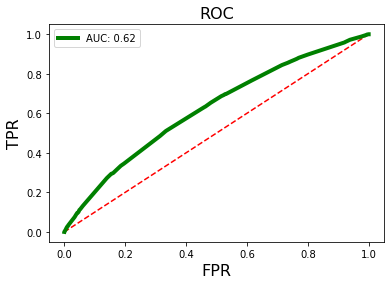

In [594]:
%matplotlib inline
plt.figure(figsize=(6, 4))
plt.plot([0,1], [0,1], 'r--')

fpr, tpr, thresholds = roc_curve(y_test,y_test_prob_hat)
roc_auc = roc_auc_score(y_test, y_test_prob_hat)

label = 'AUC:' + ' {0:.2f}'.format(roc_auc)
plt.plot(fpr, tpr, c = 'g', label = label, linewidth = 4)
plt.xlabel('FPR', fontsize = 16)
plt.ylabel('TPR', fontsize = 16)
plt.title('ROC', fontsize = 16)
plt.legend();

In [566]:
atree_cm = confusion_matrix(y_test, y_test_hat)
print(atree_cm)

[[11650  2152]
 [ 6657  2784]]



___

##### Alternative feature relevence rating

The classification trees also are useful because they allow us to obtain an alternative method to hail the characteristics. With this metica we can compare the results previously obtained with this new "opinion."

___

In [577]:
atree_fr = pd.DataFrame({'feature':X_train.columns.values, 'relevance':atree.feature_importances_}).\
                        sort_values('relevance', ascending=False)
atree_fr

feature  relevance
3             visits   0.507089
1   number_diagnoses   0.178461
0  admission_type_id   0.134344
4            age_cat   0.108896
2        diabetesMed   0.063003
5         gender_cat   0.008207


___

### Final Charts for Decision Making

We finally have reached the the end of the road

- [x] Select most llamative features.
- [x] Decide about metrics
- [x] Perform classification model.

Now what we have left are a couple more images, one to judge the effectiveness of the models made and the last one that allows us to make judgments about the features. Next, we will present a decision tree chart and a metrics comparison:

___


In [591]:
#Save tree as dot file

export_graphviz(atree, 'tree_data.dot', rounded = True, 
                feature_names = X_train.columns.values, max_depth = 6,
                class_names = ['readmission', 'no-readmission'], filled = True)

#Convert to png

call(['dot', '-Tpng', 'tree_data.dot', '-o', 'tree_data.png', '-Gdpi=200'])

#Visualize

Image(filename='tree_data.png')

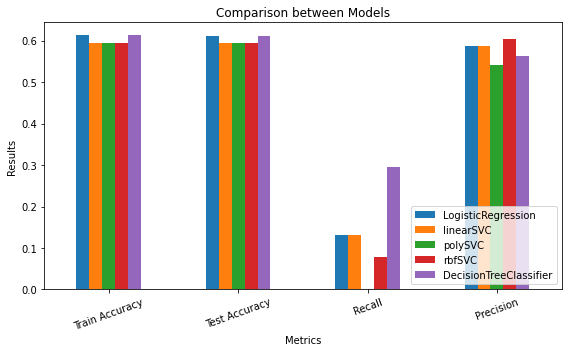

In [614]:
fig, ax = plt.subplots()
pd.DataFrame(recording).plot(kind='bar', figsize=(8, 5), ax=ax, rot=20)
ax.legend(['LogisticRegression', 'linearSVC', 'polySVC', 'rbfSVC', 'DecisionTreeClassifier'], loc='lower right')
ax.set_xlabel('Metrics')
ax.set_ylabel('Results')
ax.set_title('Comparison between Models')
plt.tight_layout()
plt.show()


___

## Conclusions

In summary, we can affirm that the information provided by the hospital over the years allows a wide variety of different analyzes that can be used to infer systematic trends. First, demographic information gives us information about patients; The results allow to infer probability distributions on the one hand and, on the other, descriptive measures on some users' features.

Regarding the machine learning models used, it is necessary to emphasize the importance of doing a subtancial data cleaning. In this way inaccuracy problems will be avoided when making the analyzes. About the used models, it was observed that their performance was acceptable for classifications using __Logistic Regression__ and __Decision Trees__; conversely, the obtaied results from differnts SVC were insufficient.

The initial fature classification showed the most relevant ones are those related to drugs for diabetes. This discovery makes sense considering the direct relationship between drug supply and diabetes treatment success/failure. Therefore, future studies can be proposed to focus the analysis on the effectiveness of different drug formulations on the health outcomes (i.e. the patients need of returning for more cares).

Besides the less obvious features, it was observed that the most important features were amongst the number of visits to the hospital, the number of diagnoses received, and the type of admission. This information may be related to the condition of the patient at the time of requesting medical services; furthermore, it may also be an indicator of the fragility of their health status. This idea was reinforced when we saw age and medicine supplying are the following most relevant features. Gender, on the other hand, may be representing either the proportion of hospital users by sex, or also the proportion of the population by gender. Therefore, this measure requires more background to be taken into account to issue an assessment.

___
